# Palmer Penguins

***

![Palmer](https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Antarctica_relief_location_map.jpg/240px-Antarctica_relief_location_map.jpg)

This notebook contains my analysis of the famous palmer penguins dataset.

The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/). 


## Imports

***

We use pandas for the DataFrame data structure.

It allows us to investigate CSV files, amongst other features.

In [1]:
# Data frames.
import pandas as pd

#Plotting library (equivalent to MatLab)
import matplotlib.pyplot as plt

# numpy
import numpy as np

## Load Data

***

Load the palmer penguins data set from a URL.


In [2]:
# Load the penguins data set.
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

The data is now loaded and we can generate an overview.

In [3]:
# Let's have a look.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In this version of the palmer penguins dataset, there are 344 rows (or records) and 7 columns (or variables). 

## Variables

***

The below table provides a summary of the variables in the data set. For each variable, it provides the:
- Definition of the variable, per the [Reference page for the simplified data set](https://allisonhorst.github.io/palmerpenguins/reference/penguins.html).
- _Type_ that should be used to model the variable in the data set in Python.
- Rationale for the variable type.

|Variable          |Definition                                                                              |Type       |Rationale                                          |
|------------------|:---------------------------------------------------------------------------------------|:----------|:--------------------------------------------------|
|species           |a factor denoting penguin species (Adélie, Chinstrap and Gentoo)                        |str        |species values are one of three strings            |
|island            |a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen) |str        |island values are one of three strings             |            
|bill_length_mm    |a number denoting bill length (millimeters)                                             |float      |bill_length_mm values are floating point numbers   |
|bill_depth_mm     |a number denoting bill depth (millimeters)                                              |float      |bill_depth_mm values are floating point numbers    |            
|flipper_length_mm |an integer denoting flipper length (millimeters)                                        |float      |flipper_length_mm values are floating point numbers|
|body_mass_g       |an integer denoting body mass (grams)                                                   |float      |body_mass_mm values are floating point numbers     |
|sex               |a factor denoting penguin sex (female, male)                                            |str        |sex values are one of two strings                  |



## Inspect Data

***

In [4]:
# Describe the data set.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
# Return information about the data.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


From the above summary, we can see 5 columns contain null values (where Non-Null Count < 344).

In [6]:
# Count missing values.
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
# Calculate means for the numeric variables and group by sex.
df.groupby('sex').mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
MALE,45.854762,17.891071,204.505952,4545.684524
FEMALE,42.096970,16.425455,197.363636,3862.272727


In [8]:
# Calculate means for the numeric variables, group by species and order by body mass.
df.groupby('species').mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Gentoo,47.504878,14.982114,217.186992,5076.016260
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Adelie,38.791391,18.346358,189.953642,3700.662252


By grouping the species in the table above and viewing their mean measurements, we can see the heavier species have longer flipper lengths. 

In [9]:
# Species Ranking: Let's use the rank() API to rank the mean values in the table above (lower rank => higher mean).
df.groupby('species').mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False).rank(ascending=False)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Gentoo,2.0,3.0,1.0,1.0
Chinstrap,1.0,1.0,2.0,2.0
Adelie,3.0,2.0,3.0,3.0


In [10]:
# Instead of grouping by species, let's group the mean values by island.
df.groupby('island').mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.257485,15.874850,209.706587,4716.017964
Dream,44.167742,18.344355,193.072581,3712.903226
Torgersen,38.950980,18.429412,191.196078,3706.372549


In [11]:
# Island ranking: Ranking the values presented in the table above.
df.groupby('island').mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False).rank(ascending=False)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,1.0,3.0,1.0,1.0
Dream,2.0,2.0,2.0,2.0
Torgersen,3.0,1.0,3.0,3.0


Comparing the island rankings with the species rankings, we can see that island may have more of an influence on the penguins' measurements thank it's species.

In [12]:
# Let's take a closer look at the species found on the different islands.
df.groupby(["species","island"])["species"].count()

species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     52
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: species, dtype: int64

The Adelie species were measured on all three islands, whereas the Chinstrap and Gentoo species were measured solely on Dream island and Biscoe island respectively.

In [13]:
df.groupby(["island","species","sex"]).count()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species   sex                                                        
Biscoe    Adelie    FEMALE              22             22                 22   
                    MALE                22             22                 22   
          Gentoo    FEMALE              58             58                 58   
                    MALE                61             61                 61   
Dream     Adelie    FEMALE              27             27                 27   
                    MALE                28             28                 28   
          Chinstrap FEMALE              34             34                 34   
                    MALE                34             34                 34   
Torgersen Adelie    FEMALE              24             24                 24   
                    MALE                23             23                 23   

                            body_mass_g  
island    species   sex                  
Biscoe    Adelie    FEMALE           22  
                    MALE             22  
          Gentoo    FEMALE           58  
                    MALE             61  
Dream     Adelie    FEMALE           27  
                    MALE             28  
          Chinstrap FEMALE           34  
                    MALE             34  
Torgersen Adelie    FEMALE           24  
                    MALE             23

In [14]:
# Let's break the mean values down by both island and species.
df.groupby(["island","species"]).mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False)

,,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,species,,,,
Biscoe,Gentoo,47.504878,14.982114,217.186992,5076.016260
Dream,Chinstrap,48.833824,18.420588,195.823529,3733.088235
Biscoe,Adelie,38.975000,18.370455,188.795455,3709.659091
Torgersen,Adelie,38.950980,18.429412,191.196078,3706.372549
Dream,Adelie,38.501786,18.251786,189.732143,3688.392857


In [15]:
# Look at the first row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [16]:
# Sex of penguins.
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [17]:
# Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [18]:
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

## Visualisations

***

#### Bar Chart

***

In [19]:
# Create numpy arrays for the data in the DataFrame to be plotted.
species, specie_count  = np.unique(df["species"], return_counts=True)

#Show arrays.
species, specie_count

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([152,  68, 124], dtype=int64))

Text(0, 0.5, 'Count')

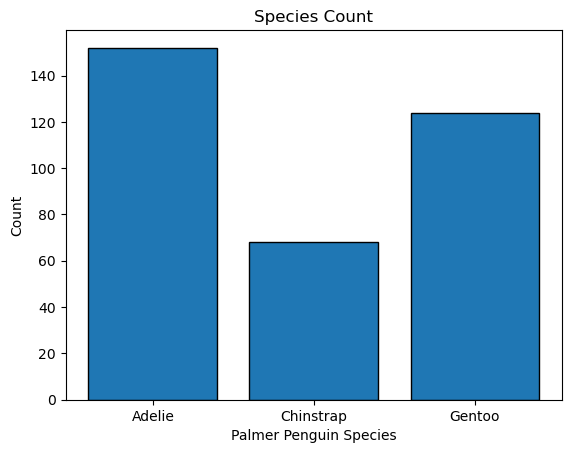

In [20]:
# Plot the species with counts on a bar chart.
plt.bar(species,specie_count,edgecolor='black')

# Format the axis labels.
plt.title("Species Count")
plt.xlabel("Palmer Penguin Species")
plt.ylabel("Count")

#### Histogram

***

In [31]:
# Create subset dataframes for the different species
adelie_df = df[df["species"].str.contains("Adelie")]
chinstrap_df = df[df["species"].str.contains("Chinstrap")]
gentoo_df = df[df["species"].str.contains("Gentoo")]

In [41]:
# Create arrays for the flipper lengths by species
adelie_flen = adelie_df["flipper_length_mm"]
chinstrap_flen = chinstrap_df["flipper_length_mm"]
gentoo_flen = gentoo_df["flipper_length_mm"]

(array([ 2.,  5., 15., 32., 30., 28., 26.,  9.,  2.,  2.]),
 array([172. , 175.8, 179.6, 183.4, 187.2, 191. , 194.8, 198.6, 202.4,
        206.2, 210. ]),
 <BarContainer object of 10 artists>)

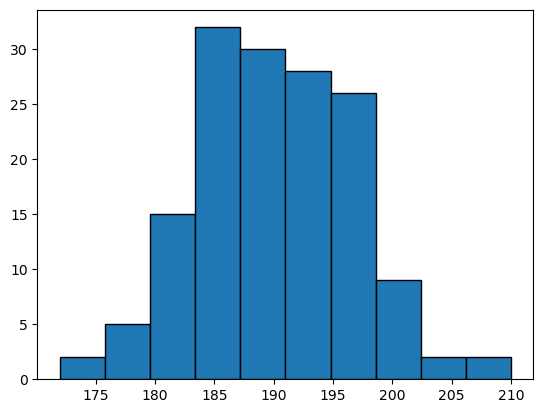

In [42]:
# Plot histogram
plt.hist(adelie_flen, edgecolor='black')

(array([ 3.,  0.,  8.,  7.,  9., 19.,  9.,  7.,  2.,  4.]),
 array([178. , 181.4, 184.8, 188.2, 191.6, 195. , 198.4, 201.8, 205.2,
        208.6, 212. ]),
 <BarContainer object of 10 artists>)

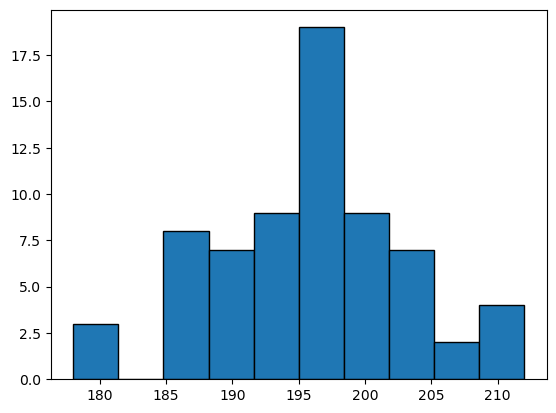

In [43]:
# Plot histogram
plt.hist(chinstrap_flen, edgecolor='black')

(array([ 1.,  8., 17., 18., 20., 16., 19.,  9.,  5., 10.]),
 array([203. , 205.8, 208.6, 211.4, 214.2, 217. , 219.8, 222.6, 225.4,
        228.2, 231. ]),
 <BarContainer object of 10 artists>)

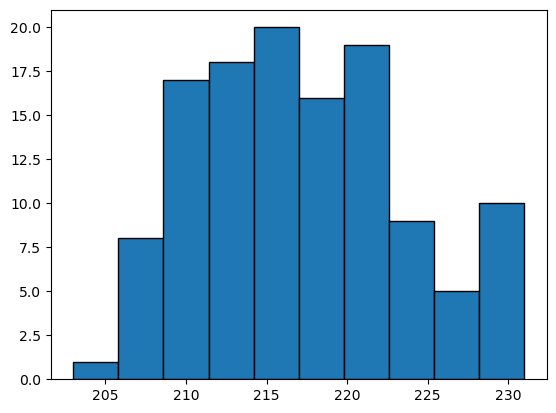

In [44]:
# Plot histogram
plt.hist(gentoo_flen, edgecolor='black')

In [22]:
# Create numpy array for the data in the DataFrame to be plotted.
flen = df["flipper_length_mm"]

#Show arrays.
flen

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64

(array([ 3., 22., 52., 79., 44., 15., 42., 42., 28., 15.]),
 array([172. , 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
        225.1, 231. ]),
 <BarContainer object of 10 artists>)

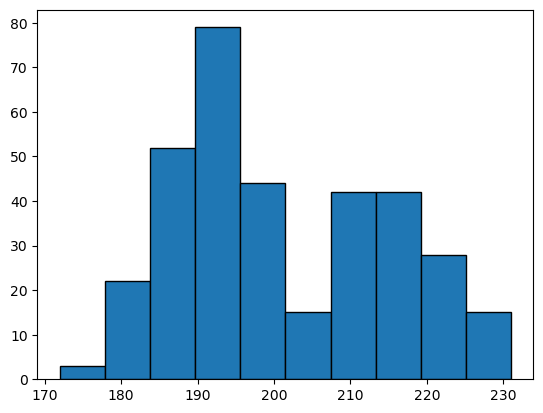

In [23]:
# Plot histogram
plt.hist(flen, edgecolor='black')

In [24]:
# 

In [25]:
# Assign the dataframe series we want to visualise as variables
blen = df["bill_length_mm"]
bdep = df["bill_depth_mm"]
flen = df["flipper_length_mm"]
bmass = df["body_mass_g"]

#### Scatterplot (Correlation)

***

## Tables

***

|Species     |Bill Length (mm)|Body Mass (g)|
|------------|--------------:|-------------:|
|Adelie      |           38.8|          3701|
|Gentoo      |           48.8|          3733|
|Chinstrap   |           47.5|          5076|

```python
print("Python is a great language!")

a = a + 1

print(a)
```

## Math

***

$f(x) = x^2$

$\sum_{i=0}^{n-1} i$

$\bar{x} = \frac{\sum_{i=0}^{n-1} x_i}{n}$

***

## End